In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from scipy import stats

In [4]:
df = pd.read_csv('/Users/alexjones/Desktop/EDA/Football_match_prediction/data/csv/dataset.csv')

In [5]:
df.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,B1,2024-09-01,18:15:00,Kortrijk,St Truiden,1.0,1.0,D,0.0,1.0,...,1.84,-0.25,1.75,2.05,1.79,2.11,1.83,2.12,1.78,2.05
1,B1,2024-09-01,17:30:00,St. Gilloise,Anderlecht,0.0,0.0,D,0.0,0.0,...,1.98,-0.50,1.93,1.93,1.94,1.94,2.00,1.94,1.95,1.85
2,B1,2024-09-01,15:00:00,Gent,Antwerp,1.0,1.0,D,1.0,1.0,...,2.13,0.00,1.80,2.05,1.85,2.05,1.91,2.06,1.84,2.00
3,B1,2024-09-01,12:30:00,Club Brugge,Cercle Brugge,3.0,0.0,H,2.0,0.0,...,2.58,-1.00,1.90,1.95,1.93,1.96,1.93,2.01,1.88,1.93
4,B1,2024-08-31,19:45:00,Oud-Heverlee Leuven,Standard,2.0,0.0,H,1.0,0.0,...,1.80,-0.50,1.98,1.88,1.96,1.93,1.98,1.93,1.95,1.86


In [6]:
df.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
count,1508.000000,1508.000000,1504.000000,1504.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,...,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000
mean,1.594828,1.323607,0.706782,0.580452,13.212908,11.106454,4.904192,4.165669,11.667997,12.463074,...,2.208820,-0.253481,1.921187,1.927712,1.943607,1.950351,1.998137,2.004595,1.913833,1.920670
std,1.319910,1.184415,0.849128,0.753022,5.241814,4.628471,2.493427,2.356077,3.832662,3.912806,...,0.326122,0.779494,0.092483,0.092205,0.091927,0.091882,0.094537,0.098014,0.084488,0.085021
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.000000,...,1.500000,-2.750000,1.600000,1.700000,1.710000,1.730000,1.800000,1.760000,1.720000,1.720000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,9.000000,10.000000,...,1.980000,-0.750000,1.850000,1.850000,1.880000,1.880000,1.920000,1.930000,1.850000,1.850000
50%,1.000000,1.000000,1.000000,0.000000,12.000000,11.000000,5.000000,4.000000,11.000000,12.000000,...,2.160000,-0.250000,1.930000,1.930000,1.930000,1.950000,2.000000,2.000000,1.910000,1.920000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,14.000000,6.000000,6.000000,14.000000,15.000000,...,2.382500,0.250000,2.000000,2.000000,2.012500,2.020000,2.070000,2.070000,1.980000,1.990000
max,7.000000,7.000000,5.000000,4.000000,33.000000,29.000000,16.000000,22.000000,25.000000,26.000000,...,3.810000,2.000000,2.200000,2.300000,2.190000,2.220000,2.400000,2.420000,2.160000,2.150000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 93 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Div        1508 non-null   object 
 1   Date       1508 non-null   object 
 2   Time       1508 non-null   object 
 3   HomeTeam   1508 non-null   object 
 4   AwayTeam   1508 non-null   object 
 5   FTHG       1508 non-null   float64
 6   FTAG       1508 non-null   float64
 7   FTR        1508 non-null   object 
 8   HTHG       1504 non-null   float64
 9   HTAG       1504 non-null   float64
 10  HTR        1504 non-null   object 
 11  HS         1503 non-null   float64
 12  AS         1503 non-null   float64
 13  HST        1503 non-null   float64
 14  AST        1503 non-null   float64
 15  HF         1503 non-null   float64
 16  AF         1503 non-null   float64
 17  HC         1503 non-null   float64
 18  AC         1503 non-null   float64
 19  HY         1504 non-null   float64
 20  AY      

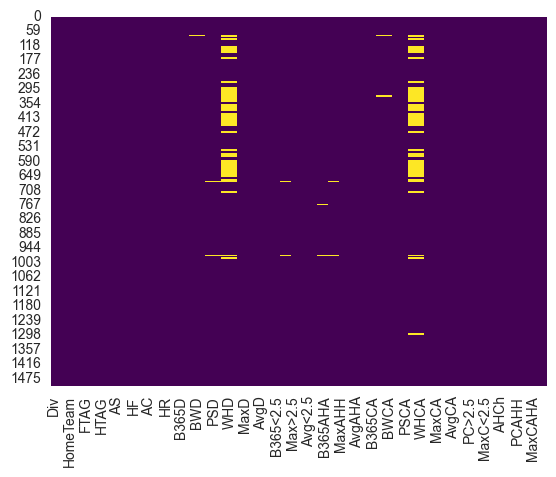

In [8]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [9]:
round(df.isnull().sum() * 100 / len(df), 1)

Div         0.0
Date        0.0
Time        0.0
HomeTeam    0.0
AwayTeam    0.0
           ... 
PCAHA       0.0
MaxCAHH     0.0
MaxCAHA     0.0
AvgCAHH     0.0
AvgCAHA     0.0
Length: 93, dtype: float64

In [10]:
df.duplicated().sum()

0

In [12]:
columns_names = df.columns.tolist()
columns_names

['Div',
 'Date',
 'Time',
 'HomeTeam',
 'AwayTeam',
 'FTHG',
 'FTAG',
 'FTR',
 'HTHG',
 'HTAG',
 'HTR',
 'HS',
 'AS',
 'HST',
 'AST',
 'HF',
 'AF',
 'HC',
 'AC',
 'HY',
 'AY',
 'HR',
 'AR',
 'B365H',
 'B365D',
 'B365A',
 'BWH',
 'BWD',
 'BWA',
 'PSH',
 'PSD',
 'PSA',
 'WHH',
 'WHD',
 'WHA',
 'MaxH',
 'MaxD',
 'MaxA',
 'AvgH',
 'AvgD',
 'AvgA',
 'B365>2.5',
 'B365<2.5',
 'P>2.5',
 'P<2.5',
 'Max>2.5',
 'Max<2.5',
 'Avg>2.5',
 'Avg<2.5',
 'AHh',
 'B365AHH',
 'B365AHA',
 'PAHH',
 'PAHA',
 'MaxAHH',
 'MaxAHA',
 'AvgAHH',
 'AvgAHA',
 'B365CH',
 'B365CD',
 'B365CA',
 'BWCH',
 'BWCD',
 'BWCA',
 'PSCH',
 'PSCD',
 'PSCA',
 'WHCH',
 'WHCD',
 'WHCA',
 'MaxCH',
 'MaxCD',
 'MaxCA',
 'AvgCH',
 'AvgCD',
 'AvgCA',
 'B365C>2.5',
 'B365C<2.5',
 'PC>2.5',
 'PC<2.5',
 'MaxC>2.5',
 'MaxC<2.5',
 'AvgC>2.5',
 'AvgC<2.5',
 'AHCh',
 'B365CAHH',
 'B365CAHA',
 'PCAHH',
 'PCAHA',
 'MaxCAHH',
 'MaxCAHA',
 'AvgCAHH',
 'AvgCAHA']

<Axes: >

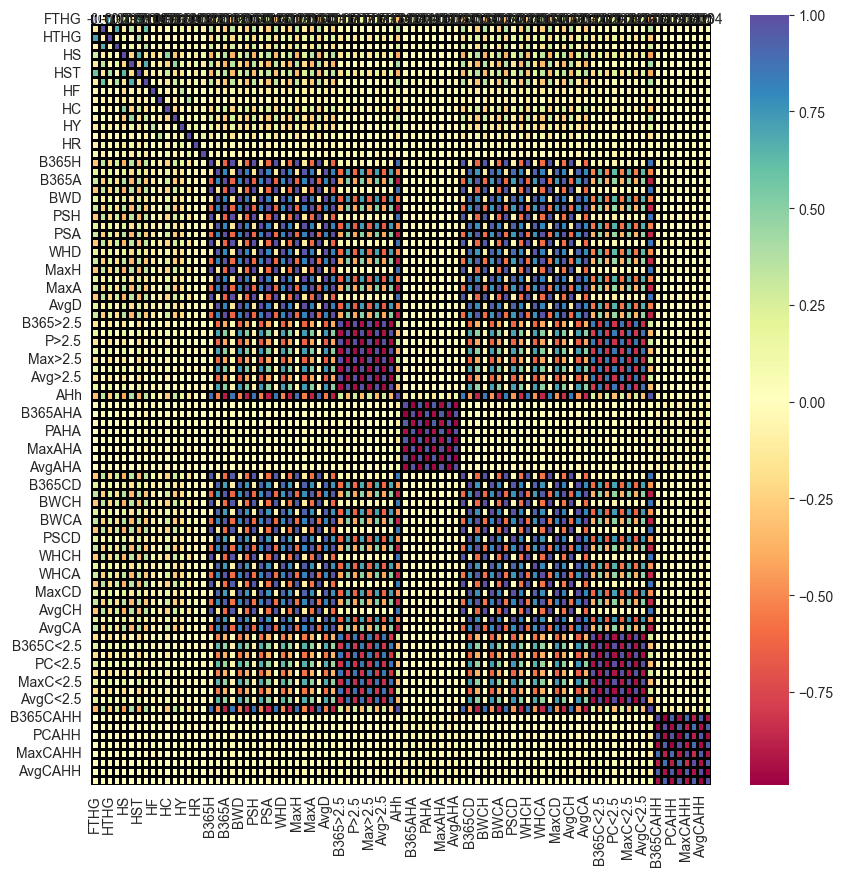

In [14]:
df_numb = df.select_dtypes(exclude=['object'])


plt.figure(figsize = (10, 10)) 
sns.heatmap(df_numb.corr(), annot = True, cmap = "Spectral", linewidths = 2, linecolor = "#000000", fmt='.2f')

In [17]:
df2 = pd.read_csv('/Users/alexjones/Desktop/EDA/Football_match_prediction/processing/B1.csv')

In [18]:
df2.shape

(312, 119)

In [19]:
df.shape

(1508, 93)